### Project's Description

**Content**
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries <br>

The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. <br>

In this project we have considered data from year 2000-2015 for 193 countries for further analysis. The final dataset consists of 22 Columns and 2938 rows which meant 20 predicting variables.

**Variable Descriptions **<br>
1. **country** (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo) <br>
2. **year**(Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015) <br>
3. **status** (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
4. **life_expectancy** (Ratio) - the life expectancy of people in years for a particular country and year
5. **adult_mortality** (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

6. **infant_deaths** (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

7. **alcohol**(Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

8. **percentage_expenditure** (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
9. **hepatitis_b** (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
10. **measles** (Ratio) - number of reported Measles cases per 1000 population
11. **bmi** (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
12. **under-five_deaths** (Ratio) - number of people under the age of five deaths per 1000 population
13. **polio** (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
14. **total_expenditure** (Ratio) - government expenditure on health as a percentage of total government expenditure
15. **diphtheria** (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
16. **hiv/aids** (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
17. **gdp** (Ratio) - Gross Domestic Product per capita
18. **population** (Ratio) - population of a country
19. **thinness_1-19_years** (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
20. **thinness_5-9_years** (Ratio) - rate of thinness among people aged 5-9
21. **income_composition_of_resources** (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. **schooling** (Ratio) - average number of years of schooling of a population



Today  and on the next workshop we will:
1. See how average life expectancy is different for developed/developing countries
2. Identify countries that are in "risk" zone for mortality.
3. Try to find a paradox in GDP vs expenditure on health within developed/developing
4. Create a "profile analysis" for immunization in developed/developing countries
5. Check whether BMI and body weight related measure should be included in the methodology of WHO

**Why WHO needs that?**
One of the goals of WHO is helping countries in creating better health programs. Over the years they've created several methods on analyzing which parameters work better/worse for specific countries. They have already filtered out some of the parameters that they're particular interested what is the difference in general health indicators between developed and developing countries, especially in terms of economic development/expenditure and immunization. If WHO knows which indicators are the same for two types of countires and which are different, it will help them to adjust recommendations for types of countries, make them more unique.

In [8]:
# needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
import seaborn as sns

In [24]:
data=pd.read_csv('Life Expectancy Data.csv',sep=',')

In [25]:
#renaming columns
data.columns=data.columns.str.lower()
data.columns=data.columns.str.replace(' ','_')

In [12]:
data.head()

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
data.groupby(['status'])['country'].nunique()

status
Developed      32
Developing    161
Name: country, dtype: int64

### EDA

In [6]:
data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy_                    10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles_                             0
_bmi_                               34
under-five_deaths_                   0
polio                               19
total_expenditure                  226
diphtheria_                         19
_hiv/aids                            0
gdp                                448
population                         652
_thinness__1-19_years               34
_thinness_5-9_years                 34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [18]:
len(data[data.isnull().any(axis=1)])/len(data)

0.4387338325391423

In [21]:
data.describe()

,year,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [29]:
data[data.infant_deaths == 0]['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Austria', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan',
       'Bosnia and Herzegovina', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Cook Islands', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominica', 'Estonia', 'Fiji', 'Finland', 'Greece',
       'Grenada', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Kiribati', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg',
       'Maldives', 'Malta', 'Marshall Islands', 'Mauritius',
       'Micronesia (Federated States of)', 'Monaco', 'Montenegro',
       'Nauru', 'New Zealand', 'Niue', 'Norway', 'Palau', 'Portugal',
       'Qatar', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Singapore', 'Slovakia',
       'Slovenia', 'Solomon Islands', 'Suriname', 'Sweden', 'Switzerland',
       'The former Yugoslav republic of Macedonia', 'Tong

In [22]:
data.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
year,2938,2007,4,2000,2004,2008,2012,2015
life_expectancy_,2928,69,9,36,63,72,75,89
adult_mortality,2928,164,124,1,74,144,228,723
infant_deaths,2938,30,117,0,0,3,22,1800
alcohol,2744,4,4,0,0,3,7,17
percentage_expenditure,2938,738,1987,0,4,64,441,19479
hepatitis_b,2385,80,25,1,77,92,97,99
measles_,2938,2419,11467,0,0,17,360,212183
_bmi_,2904,38,20,1,19,43,56,87
under-five_deaths_,2938,42,160,0,0,4,28,2500


In [30]:
data[data.population==34]

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
1614,Maldives,2003,Developing,72.7,112.0,0,1.75,491.497891,98.0,75,...,98.0,5.9,98.0,0.1,3432.247841,34.0,14.6,14.7,0.601,11.8


### Task 1: How is life expectancy distributed?What is the world average life expectancy ? Is it the same for our categories? How are they different?

/Users/antonleonov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


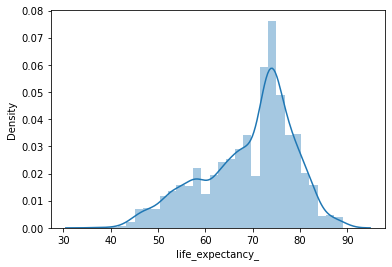

In [34]:
sns_plot = sns.distplot(data['life_expectancy_'])
fig = sns_plot.get_figure()

<AxesSubplot:>

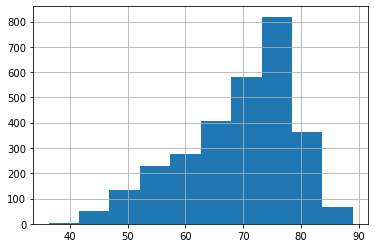

In [35]:
data.life_expectancy_.hist()

In [36]:
data.life_expectancy_.mean()

69.22493169398912

In [44]:
data.life_expectancy_.median()

72.1

In [38]:
df1 = data[data['status'] == 'Developing']

In [41]:
df1.life_expectancy_.mean()

67.11146523178817

In [42]:
data[data['status'] == 'Developed'].life_expectancy_.mean()

79.19785156249996

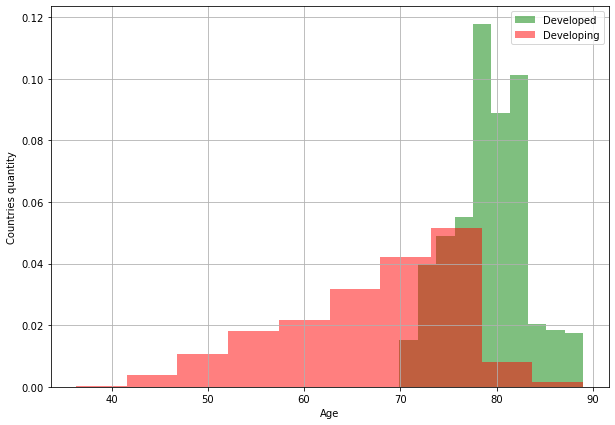

In [43]:
data[data.status == 'Developed'].life_expectancy_.hist(figsize=(10,7), color='green', alpha = 0.5, density=True)
data[data.status == 'Developing'].life_expectancy_.hist(figsize=(10,7), color='red', alpha = 0.5, density=True)
plt.xlabel('Age')
plt.ylabel('Countries quantity')
plt.legend(['Developed', 'Developing'])
plt.show()

array([<AxesSubplot:title={'center':'Developed'}>,
       <AxesSubplot:title={'center':'Developing'}>], dtype=object)

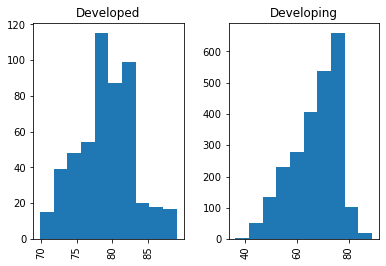

In [45]:
data.life_expectancy_.hist(by=data['status'])

In [47]:
data.groupby('status')['life_expectancy_'].agg(['mean', 'median']).reset_index()

,status,mean,median
0,Developed,79.197852,79.25
1,Developing,67.111465,69.00


### Task 2:<br> Identify  risky countries in terms of mortality

**Which countries are in risk zones in terms of mortality? What is average mortality overall? By category?**<br>
 Country is in the risk zone if it's above higher average mortality rate.<br>
 **Find countries that are not in the risk zone overall but have higher than average mortality rate per group.**

In [48]:
data.groupby('status')['adult_mortality'].mean()

status
Developed      79.685547
Developing    182.833195
Name: adult_mortality, dtype: float64

In [49]:
data.groupby('status')['adult_mortality'].median()

status
Developed      73.0
Developing    163.0
Name: adult_mortality, dtype: float64

In [50]:
data[data['adult_mortality'] > data.adult_mortality.mean()].country.unique()

array(['Afghanistan', 'Angola', 'Bahamas', 'Bangladesh', 'Belarus',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', "Côte d'Ivoire",
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Colombia', 'Comoros', 'Congo',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Egypt', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia',
       'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia',
       'Iraq', 'Jamaica', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Latvia', 'Lesotho', 'Liberia',
       'Lithuania', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Micronesia (Federated States of)', 'Mongolia',
       'Mozamb

In [52]:
am_developing_mean = data[data['status'] == 'Developing'].adult_mortality.mean()

In [54]:
am_developing_mean

182.8331953642384

In [56]:
data[
    (data['status'] == 'Developing') & (data['adult_mortality'] < am_developing_mean)
    & (data['adult_mortality'] > data['adult_mortality'].mean())
].country.unique()

array(['Bahamas', 'Bangladesh', 'Belize', 'Brazil', 'Cambodia',
       'Colombia', "Democratic People's Republic of Korea",
       'Dominican Republic', 'Egypt', 'El Salvador', 'Estonia', 'Grenada',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Jamaica', 'Kyrgyzstan',
       'Mauritius', 'Micronesia (Federated States of)', 'Nepal',
       'Nicaragua', 'Pakistan', 'Paraguay', 'Republic of Moldova',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
       'Seychelles', 'Solomon Islands', 'Sri Lanka', 'Suriname',
       'Tajikistan', 'Thailand', 'Timor-Leste', 'Trinidad and Tobago',
       'Vanuatu', 'Venezuela (Bolivarian Republic of)'], dtype=object)

In [57]:
data[
    (data['status'] == 'Developed') 
    & (data['adult_mortality'] < data[data['status'] == 'Developed'].adult_mortality.mean())
    & (data['adult_mortality'] > data['adult_mortality'].mean())
].country.unique()

array([], dtype=object)

## Task 3: Analysis of immunization

**For each country find  and average immunization rate for all years. Calculate the mean, dispersion, standard deviation. Plot histograms, describe how distributions varies among two groups of countries**

In [59]:
data.columns

Index(['country', 'year', 'status', 'life_expectancy_', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles_', '_bmi_', 'under-five_deaths_', 'polio', 'total_expenditure',
       'diphtheria_', '_hiv/aids', 'gdp', 'population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [61]:
immun = data.groupby(['country', 'status'])['hepatitis_b', 'polio', 'diphtheria_'].mean().reset_index()

<ipython-input-61-ccd5131e5d31>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  immun = data.groupby(['country', 'status'])['hepatitis_b', 'polio', 'diphtheria_'].mean().reset_index()


In [62]:
immun.head()

,country,status,hepatitis_b,polio,diphtheria_
0,Afghanistan,Developing,64.562500,48.3750,52.3125
1,Albania,Developing,98.000000,98.1250,98.0625
2,Algeria,Developing,78.000000,91.7500,91.8750
3,Angola,Developing,70.222222,46.1250,47.6875
4,Antigua and Barbuda,Developing,98.266667,96.9375,98.3125


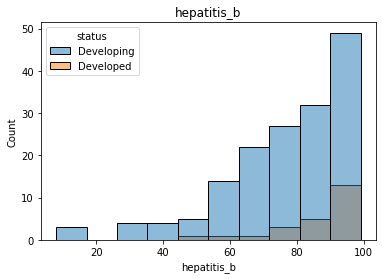

Avg is 78.51828170320016


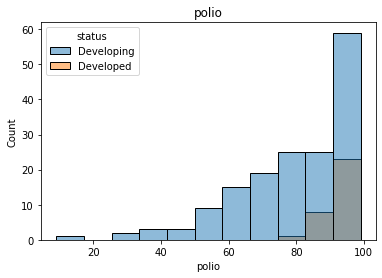

Avg is 82.43044966691339


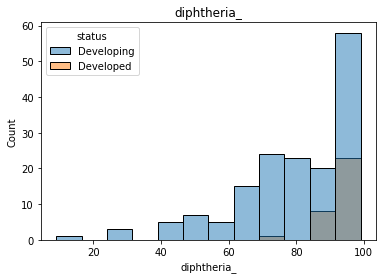

Avg is 82.22844189489267


In [69]:
def immun_hist(vaccine):
    sns.histplot(immun, x = vaccine, hue='status')
    plt.title(vaccine)
    plt.show()
    print('Avg is ' + str(immun[vaccine].mean()))
    
immun_hist('hepatitis_b')
immun_hist('polio')
immun_hist('diphtheria_')